<a href="https://colab.research.google.com/github/ritiknayakzz/ML-with-Sklearn/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A clustering algorithm from scratch**

In [41]:
## Much of the code is taken from Joel Grus', "Data Science from Scratch" book
class KMeans:

  def __init__(self, k):
    ## Let's set the initial no. of clusters as k
    ## and initial means as 0
    self.k = k
    self.means = None

  def classify(self, input):
    return min(range(self.k),
               key = lambda i: squared_distance(input, self.means[i]))
    
  def train(self, inputs):
    self.means = random.sample(inputs, self.k)
    assignments = None

    while True:
      new_assignments = map(self.classify, inputs)

      if assignments == new_assignments:
        return

      assignments = new_assignments

      for i in range(self.k):
        i_points = [p for p, a in zip(inputs, assignments) if a == i]

        if i_points:
          self.means[i] = mean(i_points)


def squared_distance(input, point):
  dist = input - point
  return dist ** 2

def mean(xs, ddof = None):
  n = len(xs)
  sm = sum(xs)
  if ddof:
    return sm / ddof
  else:
    return sm / n

**Using the Sklearn library**

In [33]:
import numpy as np
import random
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import seaborn as sns

X = np.array([[1, 2], [2, 4], [2.4, 0],
              [10, 2], [11, 4], [11.4, 0]])

kmeans = KMeans(2, random_state = 0).fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

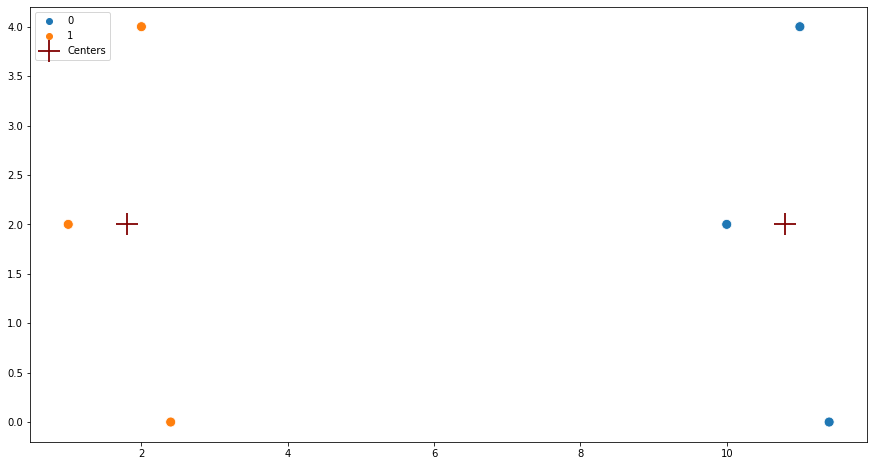

In [39]:
plt.figure(figsize = (15, 8))

sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = labels, s = 100)
sns.scatterplot(x = centers[:, 0], y = centers[:, 1], marker = '+', color = 'maroon', s = 500, label = 'Centers')

In [40]:
kmeans.predict([[0, 0], [12, 3]])

array([1, 0], dtype=int32)